<a href="https://colab.research.google.com/github/georgeboorman/NBA-Players-Analysis/blob/main/Analysing_NBA_Player_Data_Over_50_Seasons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Analysing NBA Player Data Over 50 Seasons**

This project aims to gathering and reviewing data relating to [NBA](www.nba.com) players across seasons from 1970 to 2020. 

The project will involve:

* Data Gathering
* Data Cleaning
* Exploratory Data Analysis
* Insights and Recommendations


## Data Gathering

Data will be collected from [Basketball Reference](https://www.basketball-reference.com) detailing player statistics for all seasons from 1970 to 2020.

This data will be aggregated into a single dataframe and features converted into appropriate data types for analysis. 



In [1]:
# Import required libraries

from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time

In [ ]:
# Set initial variables for extracting data into a dictionary for conversion into a dataframe

# List of seasons we want to extract
years = list(np.arange(1970, 2020))

# Creating a dictionary to store the scraped data per season
seasons_dict = {}

In [ ]:
# Extracting and converting to dataframe using pd.read_html

for year in years: 
  # Loop through URLs and scrape data
  url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html".format(year)
  data = pd.read_html(url)

  # Remov first element from list
  data = data.pop(0)
  
  # Add a column for season
  data['Season'] = round(year)

  # Add to a  dictionary
  seasons_dict[year] = data

  # Wait to run next query
  time.sleep(1)

In [ ]:
# Checking all seasons are in the dictionary
print(seasons_dict.keys())

dict_keys([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])


In [ ]:
# Combining into a single dataframe
df = pd.concat(seasons_dict.values())

In [ ]:
# Inspecting the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24071 entries, 0 to 733
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      24071 non-null  object
 1   Player  24071 non-null  object
 2   Pos     24071 non-null  object
 3   Age     24071 non-null  object
 4   Tm      24071 non-null  object
 5   G       24071 non-null  object
 6   GS      20574 non-null  object
 7   MP      24071 non-null  object
 8   FG      24071 non-null  object
 9   FGA     24071 non-null  object
 10  FG%     23963 non-null  object
 11  3P      21221 non-null  object
 12  3PA     21221 non-null  object
 13  3P%     17598 non-null  object
 14  2P      24071 non-null  object
 15  2PA     24071 non-null  object
 16  2P%     23911 non-null  object
 17  eFG%    23963 non-null  object
 18  FT      24071 non-null  object
 19  FTA     24071 non-null  object
 20  FT%     23158 non-null  object
 21  ORB     23091 non-null  object
 22  DRB     23091 non-null  

In [ ]:
# Saving file locally
from google.colab import files
df.to_excel('nba_players.xlsx')
files.download('nba_players.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# Start point after extracting and saving data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/NBA Project/nba_players.xlsx')

In [15]:
# Removing duplicate headers
df.drop(df[df['Player'] == 'Player'].index, inplace=True)

# Checking removal of duplicate headers
print(df[df['Player'] == 'Player'])

Empty DataFrame
Columns: [Unnamed: 0, Rk, Player, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, Season]
Index: []


In [16]:
# Viewing frequency of players by season
print(df['Season'].value_counts(ascending=False))

2019    708
2018    664
2015    651
2011    625
2014    611
2008    595
2017    595
2004    585
2005    585
2009    582
2016    578
2010    578
1997    574
2013    573
2006    563
2012    551
1998    547
1996    545
2001    537
2007    516
1999    507
2002    500
2000    496
2003    483
1994    481
1990    459
1992    458
1995    452
1993    449
1991    441
1989    438
1988    426
1983    391
1986    379
1987    378
1978    374
1982    373
1981    363
1985    362
1977    357
1980    357
1979    344
1984    343
1975    276
1976    274
1973    269
1972    265
1971    245
1974    245
1970    201
Name: Season, dtype: int64


In [17]:
# Checking all seasons data exists in the dataframe, using LeBron James as a test
print(df_copy[df_copy['Player'] == 'LeBron James'])

        Rk        Player Pos  Age   Tm   G  ...  STL  BLK  TOV   PF   PTS  Season
13845  203  LeBron James  SG   19  CLE  79  ...  1.6  0.7  3.5  1.9  20.9    2004
14442  215  LeBron James  SF   20  CLE  80  ...  2.2  0.7  3.3  1.8  27.2    2005
15015  207  LeBron James  SF   21  CLE  79  ...  1.6  0.8  3.3  2.3  31.4    2006
15556  207  LeBron James  SF   22  CLE  78  ...  1.6  0.7  3.2  2.2  27.3    2007
16112  211  LeBron James  SF   23  CLE  75  ...  1.8  1.1  3.4  2.2  30.0    2008
16705  208  LeBron James  SF   24  CLE  81  ...  1.7  1.1  3.0  1.7  28.4    2009
17300  222  LeBron James  SF   25  CLE  76  ...  1.6  1.0  3.4  1.6  29.7    2010
17904  226  LeBron James  SF   26  MIA  79  ...  1.6  0.6  3.6  2.1  26.7    2011
18486  233  LeBron James  SF   27  MIA  62  ...  1.9  0.8  3.4  1.5  27.1    2012
19023  212  LeBron James  PF   28  MIA  76  ...  1.7  0.9  3.0  1.4  26.8    2013
19637  226  LeBron James  PF   29  MIA  77  ...  1.6  0.3  3.5  1.6  27.1    2014
20242  235  LeBr

In [18]:
# Converting relevant columns from string to numeric
numeric_cols = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Season']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [19]:
# Checking new data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23149 entries, 0 to 23148
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23149 non-null  int64  
 1   Rk          23149 non-null  int64  
 2   Player      23149 non-null  object 
 3   Pos         23149 non-null  object 
 4   Age         23149 non-null  int64  
 5   Tm          23149 non-null  object 
 6   G           23149 non-null  int64  
 7   GS          19652 non-null  float64
 8   MP          23149 non-null  float64
 9   FG          23149 non-null  float64
 10  FGA         23149 non-null  float64
 11  FG%         23041 non-null  float64
 12  3P          20299 non-null  float64
 13  3PA         20299 non-null  float64
 14  3P%         16676 non-null  float64
 15  2P          23149 non-null  float64
 16  2PA         23149 non-null  float64
 17  2P%         22989 non-null  float64
 18  eFG%        23041 non-null  float64
 19  FT          23149 non-nul

## Data Cleaning and Exploratory Data Analysis

Now the data has been sourced let's review it and clean ready for analysis. Here we want to:

- Understand the data through descriptive statistics and visualisations
- Review and amend missing values, either by removing or by filling by an appropriate estimate
- Create appropriate features from the data, for example per game statistics for points, assists, rebounds, steals, blocks, and turnovers
- Create a column for assist to turnover ratio

In [49]:
# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [24]:
# Reviewing columns
df.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Season'],
      dtype='object')

In [25]:
# Removing unnamed column, and basketball reference rank
df.drop(columns=['Unnamed: 0', 'Rk'], inplace=True)
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Season'],
      dtype='object')

In [26]:
# Viewing null values
df.isnull().sum()

Player       0
Pos          0
Age          0
Tm           0
G            0
GS        3497
MP           0
FG           0
FGA          0
FG%        108
3P        2850
3PA       2850
3P%       6473
2P           0
2PA          0
2P%        160
eFG%       108
FT           0
FTA          0
FT%        913
ORB        980
DRB        980
TRB          0
AST          0
STL        980
BLK        980
TOV       2132
PF           0
PTS          0
Season       0
dtype: int64

We can see quite a lot of missing values, some of these might be caused by changes in the NBA rules or a statistic not being recorded until part-way into our dataset. 

For instance, the [3 point shot](https://en.wikipedia.org/wiki/Three-point_field_goal) wasn't introduced until 1979. [Steals](https://en.wikipedia.org/wiki/Steal_(basketball) and [blocks](https://en.wikipedia.org/wiki/Block_(basketball)#Shot-blocking_records_in_the_NBA) were not recorded until 1973, whilst [turnovers](https://en.wikipedia.org/wiki/Turnover_(basketball) did not get recorded until 1977. 

Let's look further into the data to confirm when the above statistics begun to be collected. 

In [35]:
# Checking the year where the above mentioned statistics were recorded
df[df['Season'] <= 1985].groupby('Season')[['3P', 'STL', 'BLK', 'TOV']].sum()

,3P,STL,BLK,TOV
Season,,,,
1970,0.0,0.0,0.0,0.0
1971,0.0,0.0,0.0,0.0
1972,0.0,0.0,0.0,0.0
1973,0.0,0.0,0.0,0.0
1974,0.0,188.8,101.9,0.0
1975,0.0,219.2,102.8,0.0
1976,0.0,207.1,103.6,0.0
1977,0.0,279.1,161.6,0.0
1978,0.0,307.7,162.1,656.5


In [44]:
# Viewing which rows have missing values for FG%
print(df[df['FG%'].isna()])

               Player Pos  Age   Tm  G   GS   MP   FG  FGA  FG%   3P  3PA  \
290       Matt Guokas  SG   26  PHI  1  NaN  5.0  0.0  0.0  NaN  NaN  NaN   
528    Shaler Halimon  SF   26  ATL  1  NaN  4.0  0.0  0.0  NaN  NaN  NaN   
741       Roger Brown   C   22  LAL  1  NaN  5.0  0.0  0.0  NaN  NaN  NaN   
892    Luther Rackley   C   26  NYK  1  NaN  2.0  0.0  0.0  NaN  NaN  NaN   
1153     Mike Ratliff   C   22  KCO  2  NaN  2.0  0.0  0.0  NaN  NaN  NaN   
...               ...  ..  ...  ... ..  ...  ...  ...  ...  ...  ...  ...   
22811     George King  SF   25  PHO  1  0.0  6.0  0.0  0.0  NaN  0.0  0.0   
22919   Eric Moreland  PF   27  PHO  1  0.0  5.0  0.0  0.0  NaN  0.0  0.0   
23044    Kobi Simmons  PG   21  CLE  1  0.0  2.0  0.0  0.0  NaN  0.0  0.0   
23059    Ray Spalding  PF   21  DAL  1  0.0  1.0  0.0  0.0  NaN  0.0  0.0   
23096      Tyler Ulis  PG   23  CHI  1  0.0  1.0  0.0  0.0  NaN  0.0  0.0   

       3P%   2P  2PA  2P%  eFG%   FT  FTA    FT%  ORB  DRB  TRB  AST  STL  

The players with no FG% recorded are across multiple seasons, but appear to play very few minutes. Let's find the maximum amount of time they play

In [48]:
df.groupby('FG%')['MP'].agg(['min', 'mean', 'max', 'std'])

,min,mean,max,std
FG%,,,,
0.000,0.7,4.615825,27.0,3.294526
0.056,2.8,2.800000,2.8,NaN
0.063,6.8,6.800000,6.8,NaN
0.071,5.8,5.800000,5.8,NaN
0.077,5.4,5.400000,5.4,NaN
...,...,...,...,...
0.769,5.8,5.800000,5.8,NaN
0.778,9.5,9.500000,9.5,NaN
0.800,1.8,6.118182,14.0,4.499293


In [55]:
# Viewing the distribution of Field Goal % by Minutes Player
px.scatter(df, x='FG%', y='MP', title='Field Goal % by Minutes Played')

In [36]:
# Setting view to width of the dataframe
pd.set_option("display.max_columns", df.shape[1])

# Descriptive statistics for numeric columns
print(df.describe())

                Age             G            GS            MP            FG  \
count  23149.000000  23149.000000  19652.000000  23149.000000  23149.000000   
mean      26.717439     50.126183     23.372583     20.057039      3.144468   
std        3.941570     26.773055     28.510411     10.259402      2.290757   
min       18.000000      1.000000      0.000000      0.000000      0.000000   
25%       24.000000     26.000000      0.000000     11.500000      1.300000   
50%       26.000000     56.000000      8.000000     19.300000      2.600000   
75%       29.000000     76.000000     44.000000     28.500000      4.500000   
max       44.000000     87.000000     83.000000     46.000000     14.300000   

                FGA           FG%            3P           3PA           3P%  \
count  23149.000000  23041.000000  20299.000000  20299.000000  16676.000000   
mean       6.944278      0.438237      0.407089      1.189586      0.253620   
std        4.737614      0.096224      0.593205    

The descriptive statistics give a glimpse into the distribution of the data, for example:

- 

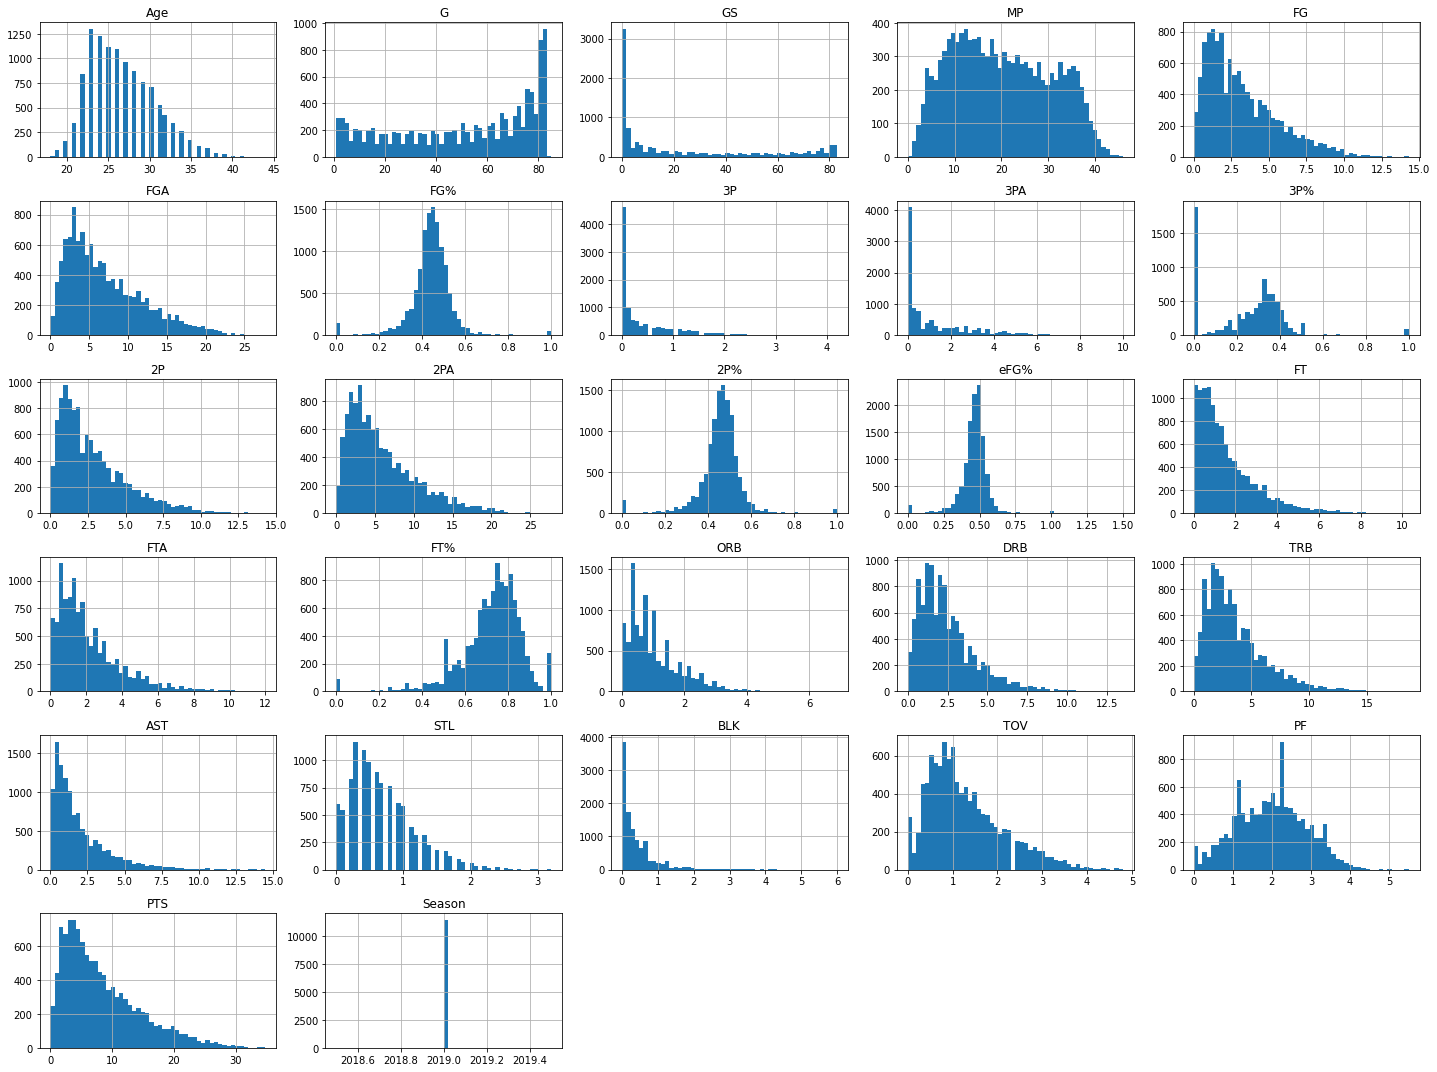

In [ ]:
# Viewing distribution of data
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

## Inferential Statistics

This section is to focusrd on answering questions using the dataset, specifically:

1.  Is there a correlation between points and rebounds, points and assists, or rebounds and assists?
2.  Has there been a significant increase in average points per game over the last 50 years? 
3.  Are NBA players better 3 point shooters now (2011-2020) vs other decades? 
4. Is there a significant difference in 3 point shooting ability amongst specific positions by decade?
5. Given there are 5 positions, how many clusters of player 'types' can we identify?
6. What feature is the best predictor of scoring ability (points per game)?
7. What is the optimal amount of features to predict scoring ability?
8. At what age do NBA players peak in terms of scoring, assists and rebounds? And has this age changed over time, i.e. are players in the 2010s peaking earlier or later than those from another decade?

Let's start by examining the data as a whole, after which we'll create subsets for the above analyses. 

The descriptive statistics highlight the following:

-`

 Add commentary.

Text(0.5, 1.0, 'Relationship between Points and Assists')

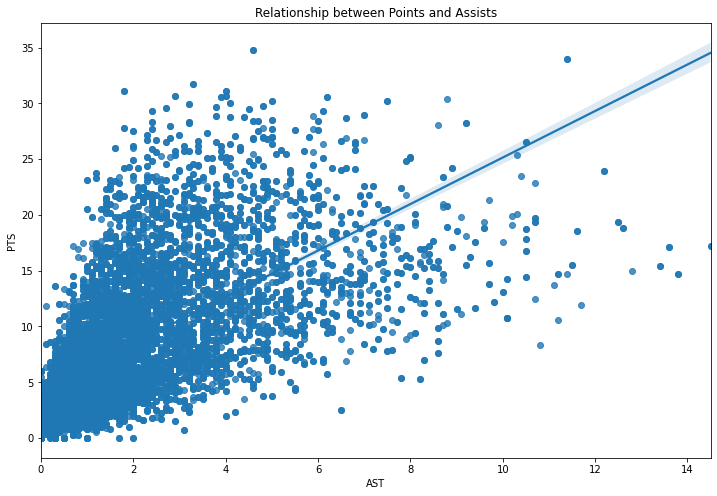

In [ ]:
# Correlation scatterplot for Assists and Points
plt.figure(figsize=(12,8))
sns.regplot(x='AST', y='PTS', data=df)
plt.title('Relationship between Points and Assists')

In [ ]:
# Points and rebounds by position
fig = px.scatter(df, x='TRB', y='PTS', color='Pos', title='Points and Rebounds by Position')
fig.show()

<Figure size 1440x1008 with 0 Axes>

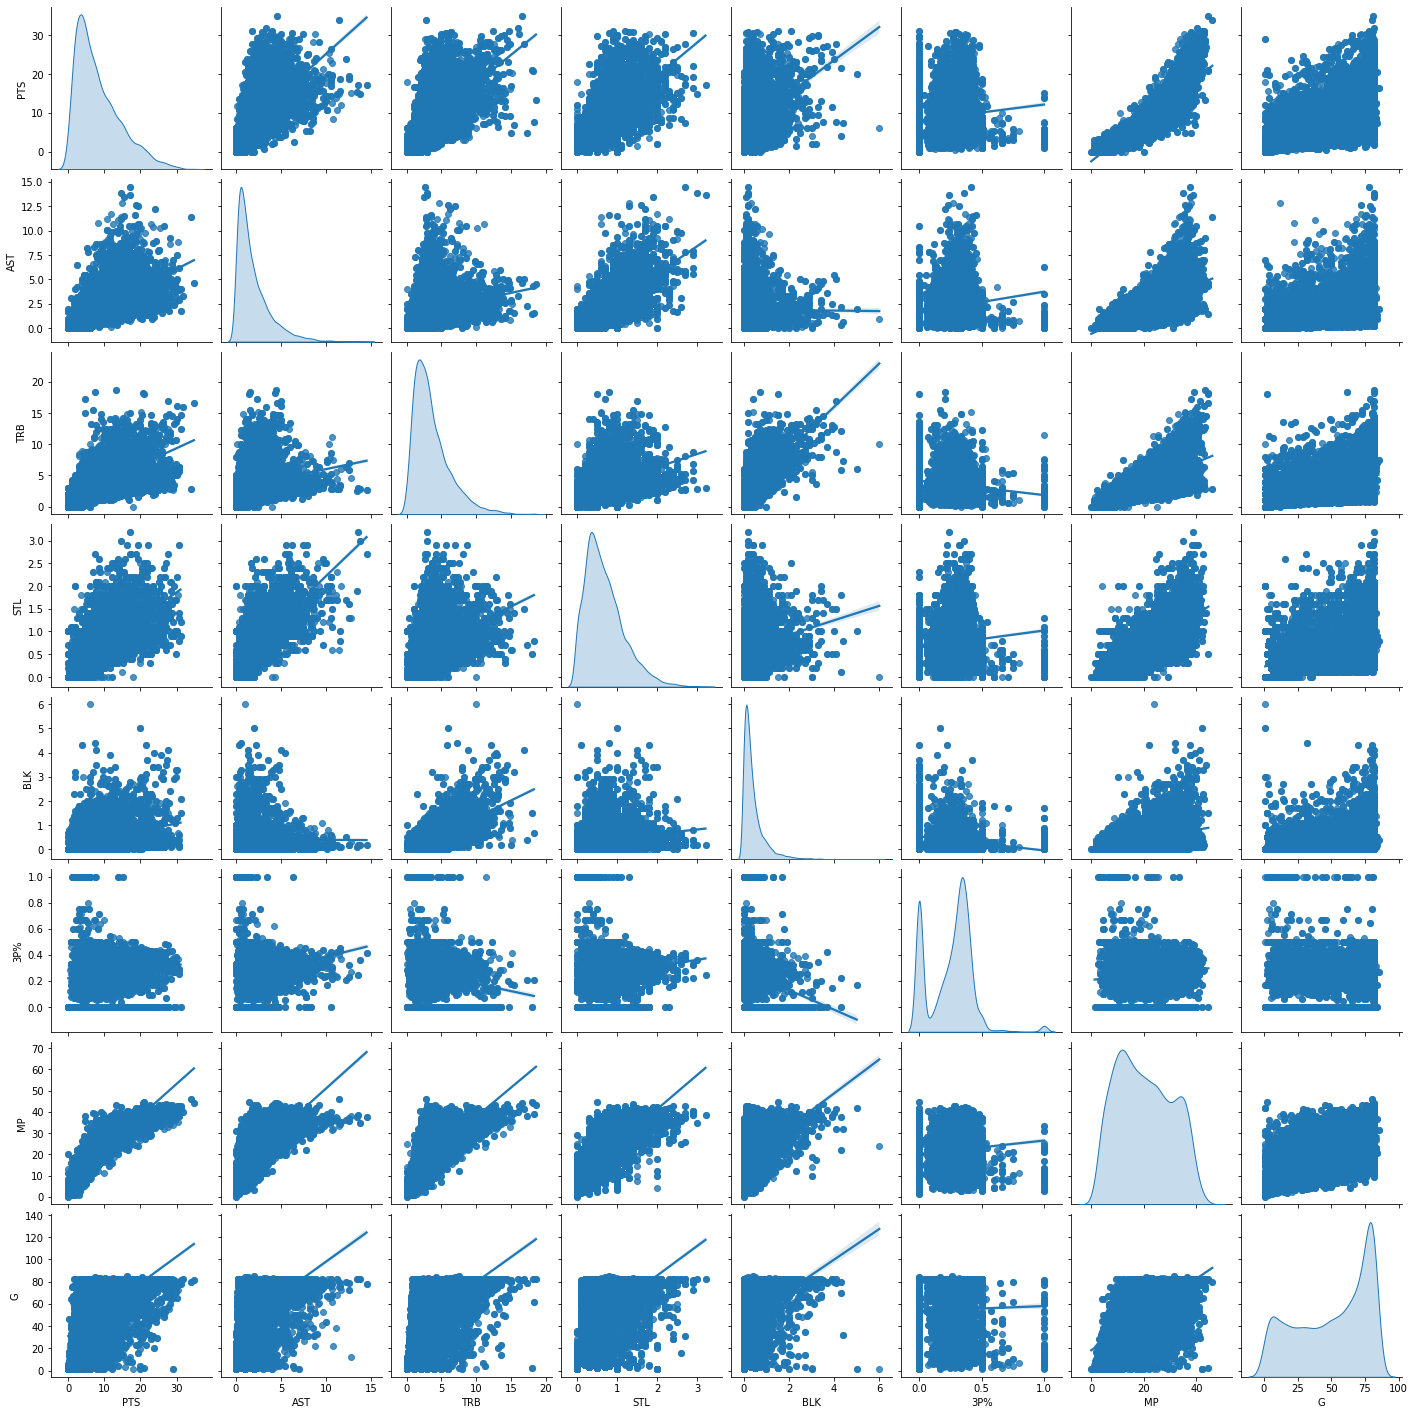

In [ ]:
# Visualising relationships between data
plt.figure(figsize=(20,14))
vars=['PTS', 'AST', 'TRB', 'STL', 'BLK', '3P%', 'MP', 'G']
sns.pairplot(df, vars=vars, kind='reg', diag_kind='kde')

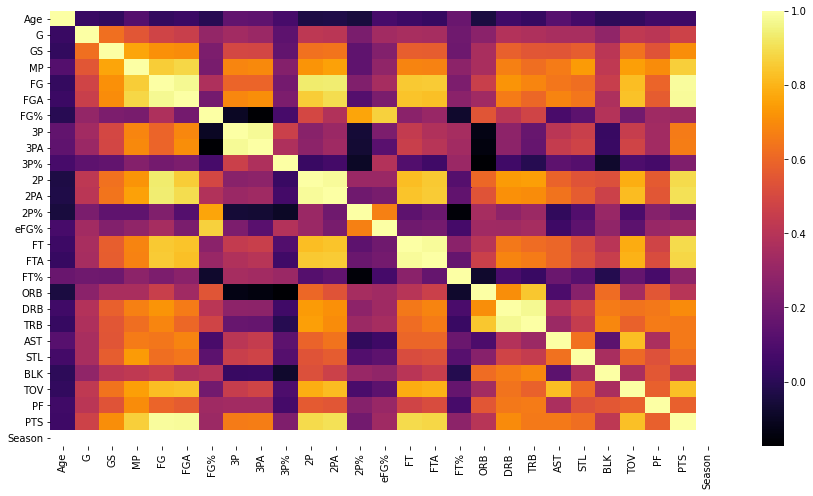

In [ ]:
# Reviewing correlation across dataframe

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='inferno')

In [ ]:
fig = px.bar(data_frame=all_seasons, x='Season', y='PTS')
fig.show()